In [24]:
# Лабораторная работа

import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *
from scipy.stats import pearsonr
import statistics
import scipy.stats

In [4]:
# 1. Загрузить файл
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
df.isnull().sum() # отсутствующих значений нет
df.describe()# mean - среднее, 50 % - медиана, min - мин, max - макс, std - стандартное отклонение

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
# для примера найдем моду одной из переменных (длина авто)
print('Значение моды: ', statistics.mode(df['length']))

Значение моды:  157.3


In [16]:
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1,0.49789,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.10579,-0.160225,-0.0201315,-0.178515,0.0704214,0.273125,-0.0358226,0.034606,-0.0801491
normalized-losses,0.49789,1,-0.0298099,0.0513748,0.122172,-0.332532,0.152171,0.166203,0.0135027,0.0386359,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.19986
wheel-base,-0.531954,-0.0298099,1,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.0513748,0.874587,1,0.841118,0.491029,0.877728,0.68336,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1,0.27921,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.21424,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.27921,1,0.295572,0.0671487,0.199995,-0.0441761,0.261214,-0.114968,-0.322525,-0.0486396,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.10579,0.166203,0.569329,0.68336,0.735433,0.0671487,0.850594,1,0.602516,0.211477,0.0289714,0.742119,-0.241031,-0.653658,-0.67747,0.870751
bore,-0.160225,0.0135027,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1,-0.0494922,0.00851147,0.537543,-0.276942,-0.55657,-0.562065,0.549438
stroke,-0.0201315,0.0386359,0.164549,0.132076,0.183379,-0.0441761,0.170425,0.211477,-0.0494922,1,0.187134,0.164722,-0.0519702,-0.0336089,-0.0365017,0.0797749


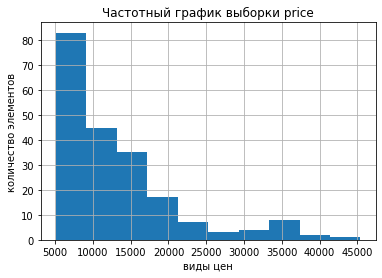

DescribeResult(nobs=205, minmax=(5118, 45400), mean=13312.71219512195, variance=65650059.98048779, skewness=1.7663998888191026, kurtosis=2.9486372932125597)

In [27]:
# 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis
plt.hist(df['price'],10)
plt.xlabel('виды цен')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки price')
plt.grid(True)
plt.show()
# это похоже экспоненциальное распределение

df_result = scipy.stats.describe(df['price'], ddof=1, bias=False)
df_result
# skewness — асимметрия; kurtosis — эксцесс набора данных.

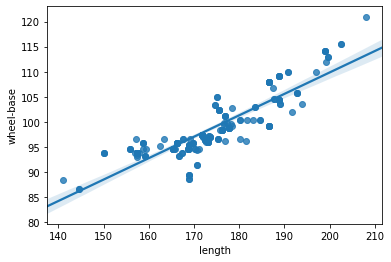

0.874587475964263


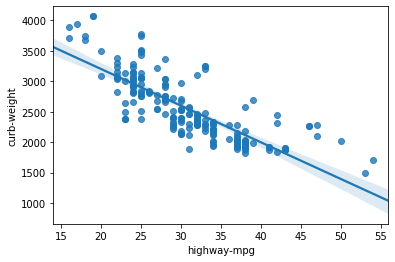

-0.7974647922811797


In [30]:
# 5. Визуализировать несколько взаимосвязей между переменными
# на основании матрицы корреляций построим график и найдем коэффициент корреляции Пирсона
# отражен график зависимости ее длины от колесной базы
sns.regplot(x="length", y="wheel-base", data=df)
plt.show()
corr, p_value = pearsonr(df['length'], df['wheel-base'])
print(corr)
# в нашем случае , чем больше длина , тем больше колесная база

# отражен график зависимости топливной экономичности от снаряженной массы авто
sns.regplot(x="highway-mpg", y="curb-weight", data=df)
plt.show()
corr, p_value = pearsonr(df['highway-mpg'], df['curb-weight'])
print(corr)
# в нашем случае , чем выше топливная экономичность , тем меньше снаряженная масса авто

In [36]:
# 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

# 1 гипотеза
# возьмем 2 выборки : 1) стоимость автомобиля менее 120 л.с. и 2) стоимость автомобиля более 120 л.с.
# нулевая гипотеза в нашем случае: взятые выборки не имеют статистического различия
price0 = df[df['horsepower']<120]['price']
price1 = df[df['horsepower']>=120]['price']
print('1-я гипотеза',stats.ttest_ind(price0,price1))

# в начем случае pvalue=0.0 , так как pvalue<=0,05, мы отвергаем нулевую гипотезу (поэтому смело можем утверждать,
# что имеются статистические различия), в нашем случае - чем мощнее автомобиль, 
# тем больше он стоит




1-я гипотеза Ttest_indResult(statistic=-14.488203539421036, pvalue=3.928959984698516e-33)
